In [1]:
#import required libraries
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
import os
os.listdir('../Files/')

['LC08_L1TP_226087_20191005_20191018_01_T1.tar.gz',
 'LC08_L1TP_226087_20191005_20191018_01_T1_ANG.txt',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B1.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B10.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B11.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B2.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B3.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B4.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B5.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B6.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B7.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B8.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_B9.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_BQA.TIF',
 'LC08_L1TP_226087_20191005_20191018_01_T1_MTL.txt']

In [5]:
band4 = rasterio.open('../Files/LC08_L1TP_226087_20191005_20191018_01_T1_B4.TIF') #Red
band5 = rasterio.open('../Files/LC08_L1TP_226087_20191005_20191018_01_T1_B5.TIF') #NIR

In [6]:
band4.height

7921

In [7]:
band4.width

7891

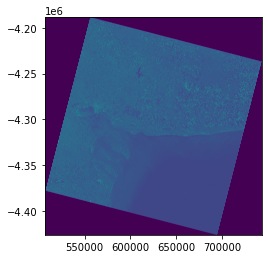

<AxesSubplot:>

In [8]:
plot.show(band4)

In [9]:
band4.dtypes[0]

'uint16'

In [10]:
band4.crs

CRS.from_epsg(32620)

In [11]:
band4.transform

Affine(30.0, 0.0, 506685.0,
       0.0, -30.0, -4188585.0)

In [15]:
band4.read(1)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

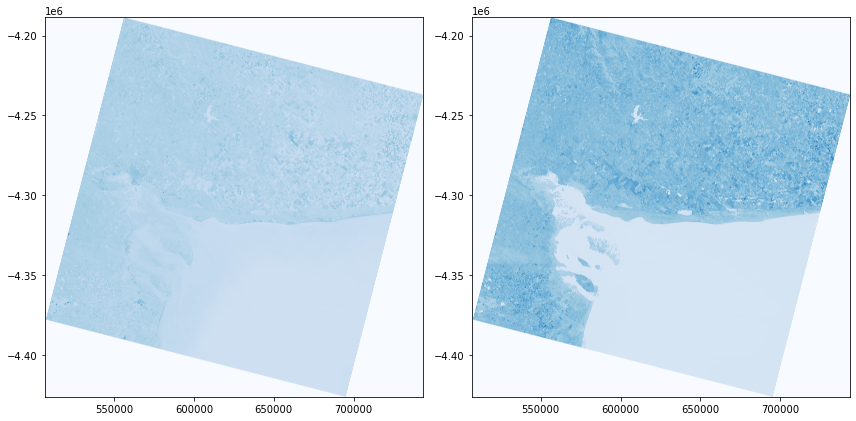

In [18]:
#multiple band representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plot.show(band4, ax=ax1, cmap='Blues') #red
plot.show(band5, ax=ax2, cmap='Blues') #nir
fig.tight_layout()

In [19]:
# En python 2, si dividis entre integers, el resultado va a ser integer, por eso transforma a float.
# Aca tengo python 3, asiq voy a probar hacerlo directo con integers.
# Eso es con numeros en python. Trabajando con Rasters en rasterio, si dividimos integers, el resultado va a ser integer. El NDVI es una fraccion, de manera que necesitamos que sea float

In [20]:
red = band4.read(1).astype('float32')
nir = band5.read(1).astype('float32')
red

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [21]:
ndvi = np.where(
    (nir+red)==0.,
    0,
    (nir-red)/(nir+red)
)
ndvi

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
ndviImage = rasterio.open('../Files/LC08_L1TP_226087_20191005_NDVI.tiff','w',
                        driver='Gtiff',
                        width=band4.width,
                        height=band4.height,
                        count=1,
                        crs=band4.crs,
                        transform=band4.transform,
                        dtype='float32'
                        )
ndviImage.write(ndvi,1)
ndviImage.close()

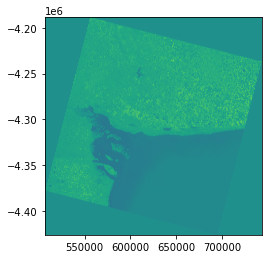

<AxesSubplot:>

In [24]:
ndvi = rasterio.open('../Files/LC08_L1TP_226087_20191005_NDVI.tiff')
plot.show(ndvi)